## YOLOV10 Object Detection

In the field of computer vision, YOLO family is well know for its unique balance in speed and accuracy, and YOLOv10 is the most recent architecture from the family.

This notebook provides an introductory walkthrough on how to use YOLOv10.

## Import Pretrained models

This section will cover importing the various YOLOv10 pretrained models.

## 1. Create a new directory

This section covers creating a new directory, 'working_dir', which will be our working directory

In [12]:
import os
# creates a new directory
os.mkdir("Workingdir")
# changes the current running directory
os.chdir("Workingdir")
# updated running directory
working_dir = os.getcwd()

## 2. Install dependencies

This section will cover cloning the YOLOv10 repository and supersion library.

In [13]:
!pip install -q supervision
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## 3. Download the pre-trained weights

In [14]:
!mkdir -p {working_dir}/weights
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {working_dir}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {working_dir}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


## 4. Model Initialization

Since we already have installed the necessary libraries, we move to initializing our YOLOV10 model. This entails loading our Yolov10 model with the pre-trained weights.

In [15]:
from ultralytics import YOLOv10

model = YOLOv10(f'{working_dir}/weights/yolov10n.pt')

## 5. Perform inference and annotate image

This sections cover how to perform inference on a sample input image. The results will be processed to extract predictions. The prections extracted will be used to annotate the image with bounding boxes and labels.


0: 480x640 2 16s, 2 77s, 256.3ms
Speed: 4.4ms preprocess, 256.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


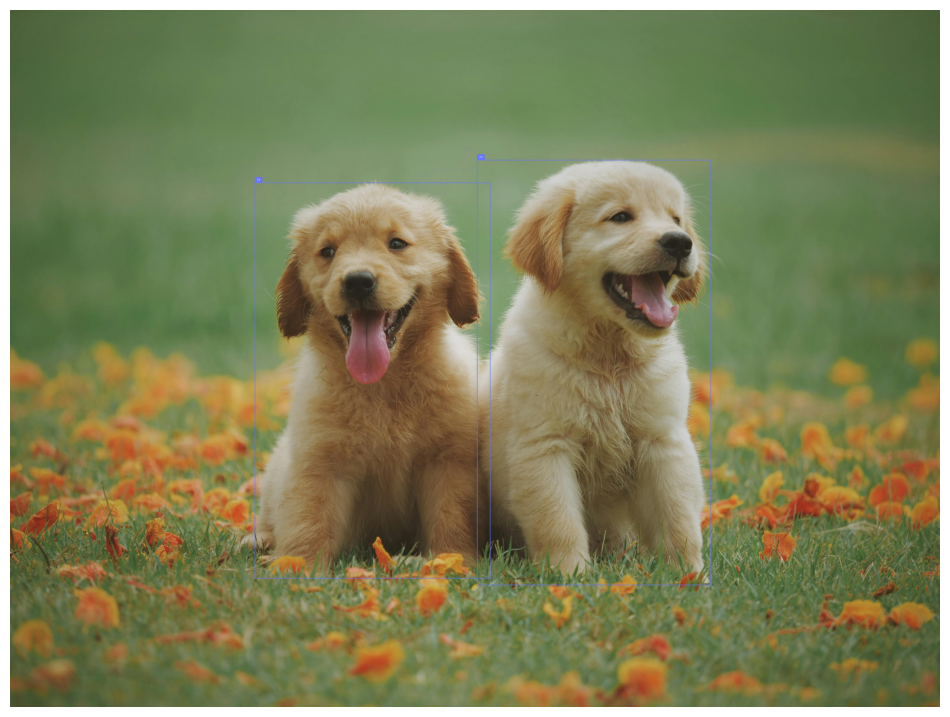

In [16]:
import cv2
import supervision as sv

image = cv2.imread("dog.jpeg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)